#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №4

## №2. (К теоретическим задачам 3, 4, 5)

В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\hat{\theta}(X)$ параметра θ выполнено неравенство Рао-Крамера $$D_{\theta}\hat{\theta}(X)\geq\frac{1}{I_{X}\theta}.$$ Cгенерируйте выборку $X_1,\dots,X_N$, $N=1000$, из распределений в теоретических задачах (распределение Бернулли, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m = 50$, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2 = 2,1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения, предложенного в файле. Для всех $n\leq N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно 500). Сделайте то же самое с другой несмещенной оценкой — в задаче 3 возьмите $\frac{X_{(1)}}{m}$, в задаче 4 возьмите $\frac{n−1}{\bar{x}}$, в задаче 5 возьмите выборочную медиану. Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике изобразите кривую зависимости $\frac{1}{I_X(\theta)}$ от $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import beta

%matplotlib inline

In [2]:
# Генерируем выборки с указанными параметрами.
N = 1000
m = 50
sigma2 = 2.1
theta = beta.rvs(1, 1, size=1)

sample_binom = binom.rvs(m, theta, size=N)
sample_expon = expon.rvs(scale=theta, size=N)
sample_norm = norm.rvs(theta, sigma2, size=N)

In [3]:
# Эффективные оценки
eff_binom = sample_binom.cumsum() * [1 / (n + 1) for n in range(N)] / m
eff_expon = sample_expon.cumsum() * [1 / (n + 1) for n in range(N)]
eff_norm = sample_norm.cumsum() * [1 / (n + 1) for n in range(N)]

In [4]:
# Для каждого распределения построили по 500 бутстрепных выборок
K = 500

bootstrap_samples_binom = [[binom.rvs(m, eff_binom[n], size=(n + 1)) for k in range(K)] for n in range(N)]
bootstrap_samples_expon = [[expon.rvs(scale=eff_expon[n], size=(n + 1)) for k in range(K)] for n in range(N)]
bootstrap_samples_norm = [[norm.rvs(eff_norm[n], sigma2, size=(n + 1)) for k in range(K)] for n in range(N)]

In [5]:
# Для каждой бутстрепной выборки посчитали эффективную оценку для каждого n = 1,2,...,N
bootstrap_estimates_binom = np.array([[bootstrap_samples_binom[n][k].cumsum() * [1 / (j + 1) 
                            for j in range(n + 1)] / m for k in range(K)] for n in range(N)])
bootstrap_estimates_expon = np.array([[bootstrap_samples_expon[n][k].cumsum() * [1 / (j + 1) for j in range(n + 1)] 
                             for k in range(K)] for n in range(N)])
bootstrap_estimates_norm = np.array([[bootstrap_samples_norm[n][k].cumsum() * [1 / (j + 1) for j in range(n + 1)] 
                            for k in range(K)] for n in range(N)])   

In [6]:
# Для каждого n считаем выборочную дисперсию по соответствующим оценкам: 
# для всех k берем значение оценки на n и считаем дисперсию этих k чисел
bootstrap_var_binom = np.array([np.sum(np.array([bootstrap_estimates_binom[n, k][n] for k in range(K)]) ** 2) / K - 
                       (np.sum([bootstrap_estimates_binom[n, k][n] for k in range(K)]) / K) ** 2 for n in range(N)])
bootstrap_var_expon = np.array([np.sum(np.array([bootstrap_estimates_expon[n, k][n] for k in range(K)]) ** 2) / K - 
                       (np.sum([bootstrap_estimates_expon[n, k][n] for k in range(K)]) / K) ** 2 for n in range(N)])
bootstrap_var_norm = np.array([np.sum(np.array([bootstrap_estimates_norm[n, k][n] for k in range(K)]) ** 2) / K - 
                       (np.sum([bootstrap_estimates_norm[n, k][n] for k in range(K)]) / K) ** 2 for n in range(N)])

In [7]:
# Посчитаем информацию Фишера для каждого n:
Fisher_binom = np.linspace(1, N, N) * m / (theta * (1 - theta))
Fisher_expon = np.linspace(1, N, N) / (theta ** 2)
Fisher_norm = np.linspace(1, N, N) / sigma2

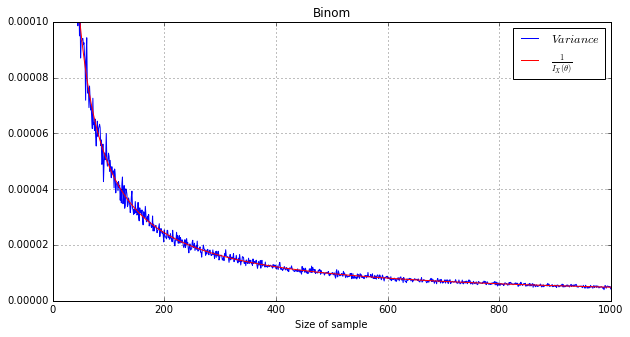

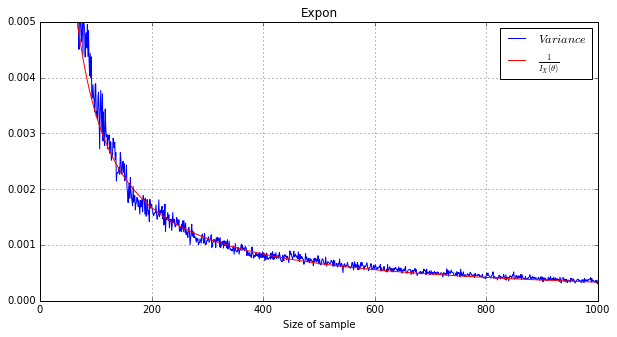

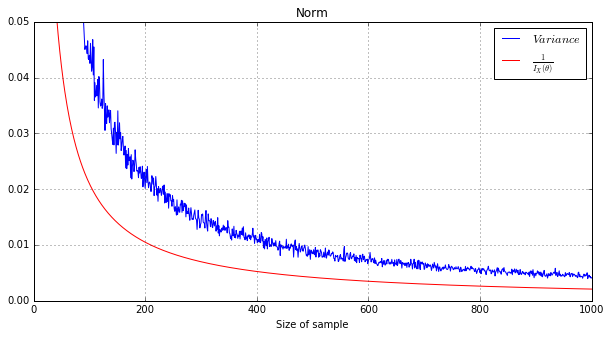

In [8]:
# Строим графики:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(1., N, N), bootstrap_var_binom, label=r'$Variance$')
plt.plot(np.linspace(1., N, N), 1  / Fisher_binom, color='red', label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.0001)

plt.legend()
plt.title(r'Binom')
plt.xlabel(r'Size of sample', fontsize='10')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(1., N, N), bootstrap_var_expon, label=r'$Variance$')
plt.plot(np.linspace(1., N, N), 1  / Fisher_expon, color='red', label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.005)

plt.legend()
plt.title(r'Expon')
plt.xlabel(r'Size of sample', fontsize='10')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(1., N, N), bootstrap_var_norm, label=r'$Variance$')
plt.plot(np.linspace(1., N, N), 1  / Fisher_norm, color='red', label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.05)

plt.legend()
plt.title(r'Norm')
plt.xlabel(r'Size of sample', fontsize='10')
plt.grid()
plt.show()

In [9]:
# Новая оценка для биномиального распределения:
eff_binom = np.array([np.min(sample_binom[:n]) for n in range(1, N + 1, 1)]) / m

In [10]:
# Бутстрепные выборки:
K = 500

bootstrap_samples_binom_1 = [[binom.rvs(m, eff_binom[n], size=(n + 1)) for k in range(K)] for n in range(N)]

In [11]:
# Для каждой бутстрепной выборки посчитали эффективную оценку для каждого n = 1,2,...,N
bootstrap_estimates_binom_1 = np.array([[np.array([np.min(bootstrap_samples_binom_1[n][k][:j]) 
                                        for j in range(1, n + 1, 1)]) / m for k in range(K)] for n in range(N)])

In [12]:
# Для каждого n считаем выборочную дисперсию по соответствующим оценкам: 
# для всех k берем значение оценки на n и считаем дисперсию этих k чисел
bootstrap_var_binom = np.array([np.sum(np.array([bootstrap_estimates_binom_1[n, k][n - 1] 
                                for k in range(K)]) ** 2) / K - (np.sum([bootstrap_estimates_binom_1[n, k][n - 1] 
                                    for k in range(K)]) / K) ** 2 for n in range(1, N, 1)])

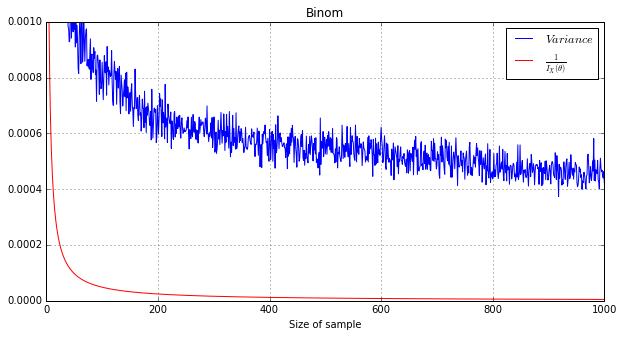

In [13]:
# Строим график:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(2., N, N - 1), bootstrap_var_binom, label=r'$Variance$')
plt.plot(np.linspace(1., N, N), 1  / Fisher_binom, color='red', label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.001)

plt.legend()
plt.title(r'Binom')
plt.xlabel(r'Size of sample', fontsize='10')
plt.grid()
plt.show()

# Вывод

Сначала мы рассмотрели несмещенные оценки $\frac{\bar{X}}{m}, \bar{X} \ \ и \ \ \bar{X}$  для указанных распределений и убедились в их эффективности: в этом случае, по определению, неравенство Крамера-Рао превращается в равенство, что и подтверждают графики. Далее мы рассмотрели другую несмещенную оценку для нормального распределения. График показал, что данная оценка не является эффективной.
